In [27]:
# Need to reverse the sequence because most recent apears first and oldest appears last
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot

from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot


from pandas.plotting import lag_plot

from pandas import concat

from pandas.plotting import autocorrelation_plot

import pandas as pd
import numpy
import numpy as np
from numpy import sqrt 
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import AutoReg
from random import random

from pandas import DataFrame
from pandas import concat

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from pandas.plotting import lag_plot



In [32]:
file = "00221634_entries_2018-03-01_to_2018-08-05.csv"
df = pd.read_csv(file, header=None, low_memory=False)
df.columns = ['time', 'bg']
print(df.shape)
df.head()
df = df.loc[df.bg!=" null", :]
print(df.shape)

(45380, 2)
(45264, 2)


In [33]:
df = df.sort_values("time")
df.head

<bound method NDFrame.head of                        time    bg
45379  2018-03-01T00:04:16Z    95
45378  2018-03-01T00:09:15Z    92
45377  2018-03-01T00:14:15Z    90
45376  2018-03-01T00:19:15Z    88
45375  2018-03-01T00:24:15Z    87
...                     ...   ...
4      2018-08-04T23:38:51Z   164
3      2018-08-04T23:43:51Z   159
2      2018-08-04T23:48:51Z   155
1      2018-08-04T23:53:51Z   153
0      2018-08-04T23:58:50Z   150

[45264 rows x 2 columns]>

In [34]:
#df = pd.read_csv("00221634_entries_2018-03-01_to_2018-08-05.csv", header=None)
#df = pd.read_csv("00221634_entries_2018-03-01_to_2018-08-05_BG_NullRemoved.csv", header=None)
# 00221634_entries_2018-03-01_to_2018-08-05_BG_NullRemoved
#df.head

# in future, remove duplicates

In [35]:
# Remove the date column; just keep BG levels
df_BG_temp=df.drop(df.columns[[0]], axis=1)
df_BG_temp.head

<bound method NDFrame.head of          bg
45379    95
45378    92
45377    90
45376    88
45375    87
...     ...
4       164
3       159
2       155
1       153
0       150

[45264 rows x 1 columns]>

In [36]:
# Drop nulls

df_BG=df_BG_temp.dropna(axis=0)
df_BG.head

<bound method NDFrame.head of          bg
45379    95
45378    92
45377    90
45376    88
45375    87
...     ...
4       164
3       159
2       155
1       153
0       150

[45264 rows x 1 columns]>

In [37]:
df_BG=df_BG[df_BG != 'null']
df_BG.head


<bound method NDFrame.head of          bg
45379    95
45378    92
45377    90
45376    88
45375    87
...     ...
4       164
3       159
2       155
1       153
0       150

[45264 rows x 1 columns]>

In [38]:


result = df_BG.dtypes

print("Output:")
print(result)

df_BG_numeric = df_BG.apply(pd.to_numeric, errors='coerce')
# pd.to_datetime is also available

result2 = df_BG_numeric.dtypes

print("Output:")
print(result2)


#df_BG.plot()
#pyplot.show()


Output:
bg    object
dtype: object
Output:
bg    int64
dtype: object


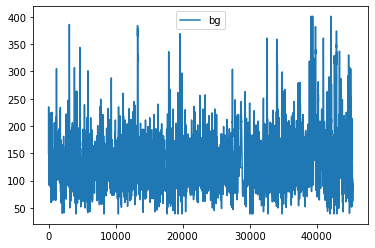

In [39]:
df_BG_numeric.plot()
pyplot.show()


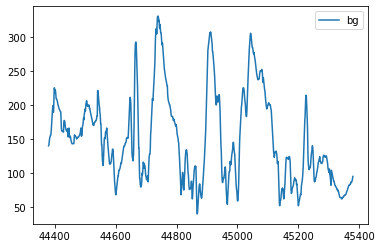

In [40]:
# Select first N entries
# Observe the sequence of BG values
N = 1000
df_BG_numeric_selected=df_BG_numeric.head(N)
df_BG_numeric_selected.plot()
pyplot.show()

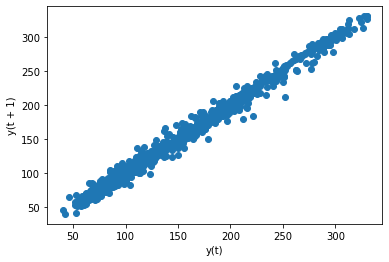

In [41]:
# Observe the relationship (correlation) between current and past samples

lag_plot(df_BG_numeric_selected)
pyplot.show()

# There is a strong correlation between the current BG value and
# the previous BG value because the points are around the diagonal

In [42]:

values = df_BG_numeric_selected
dataframe1 = concat([values.shift(1), values], axis=1)
dataframe1.columns = ['t-1', 't']
result1 = dataframe1.corr()
print(result1)
# There is a strong positive correlation (0.987) between the BG value and the lag=1 (previous BG sample) value.

          t-1         t
t-1  1.000000  0.994422
t    0.994422  1.000000


In [43]:

values = df_BG_numeric_selected
dataframe2 = concat([values.shift(2), values], axis=1)
dataframe2.columns = ['t-2', 't']
result2 = dataframe2.corr()
print(result2)
# There is a strong positive correlation (0.962) between the BG value and the lag=2 (second previous BG sample) value.

          t-2         t
t-2  1.000000  0.980722
t    0.980722  1.000000


In [44]:

values = df_BG_numeric_selected
dataframe5 = concat([values.shift(5), values], axis=1)
dataframe5.columns = ['t-5', 't']
result5 = dataframe5.corr()
print(result5)
# There is still strong positive correlation (0.849) between the BG value and the lag=5 (fifth previous BG sample) value.

          t-5         t
t-5  1.000000  0.908002
t    0.908002  1.000000


In [45]:

values = df_BG_numeric_selected
dataframe10 = concat([values.shift(10), values], axis=1)
dataframe10.columns = ['t-10', 't']
result10 = dataframe10.corr()
print(result10)
# There is still reasonably positive correlation (0.625) between the BG value and the lag=10 (tenth previous BG sample) value.

          t-10         t
t-10  1.000000  0.758289
t     0.758289  1.000000


In [46]:

values = df_BG_numeric_selected
dataframe15 = concat([values.shift(15), values], axis=1)
dataframe15.columns = ['t-15', 't']
result15 = dataframe15.corr()
print(result15)
# There is no longer a strong positive correlation (only 0.45, which is less than 0.5) 
# between the BG value and the lag=15 (fifteenth previous BG sample) value.
# No need to go back 15 previous BG sampples

          t-15         t
t-15  1.000000  0.644723
t     0.644723  1.000000


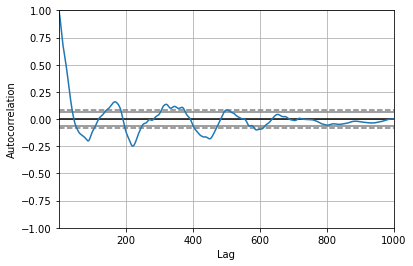

In [47]:

autocorrelation_plot(df_BG_numeric_selected)
pyplot.show()

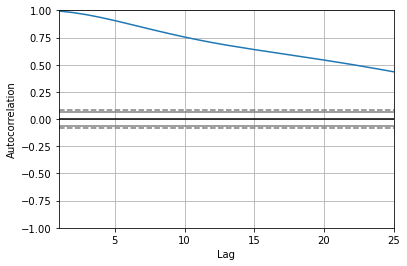

In [48]:
# Observe correlation for different lag values
# Less than 0.5 correlation usually implies less influence of a past sample on the current value

autocorrelation_plot(df_BG_numeric_selected)
pyplot.xlim(1,25)
pyplot.show()



Test MSE: 21.96


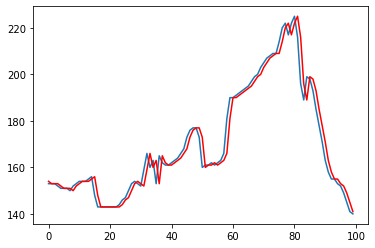

In [49]:
# Persistence Model:
# Last sample= next predicted sample
# This is for baseline performance
# We should aim to develop a model that is better than this baseline model



# create lagged dataset
values = df_BG_numeric_selected
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't']
# split into train and test sets
# Observe first 900 samples and predict next 100 samples
num_test_samples=100
X = dataframe.values
train, test = X[1:len(X)-num_test_samples], X[len(X)-num_test_samples:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
    return x
 
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.2f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

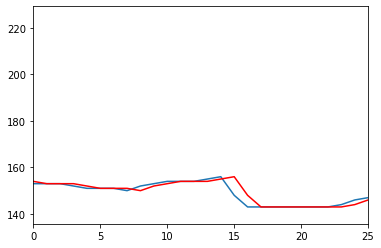

In [50]:
# Show first 25 samples for better visualization
pyplot.xlim(0,25)
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

count_rows: 45264
count_cols: 1


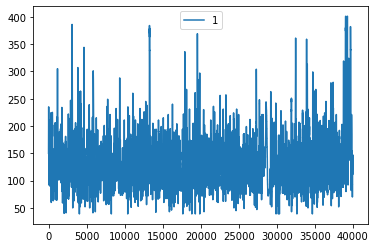

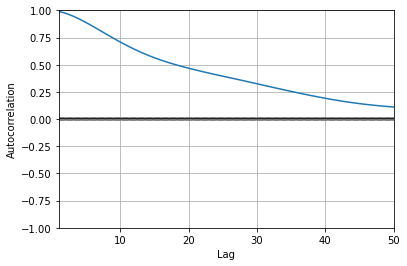

C:\Users\kntri\anaconda3new\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


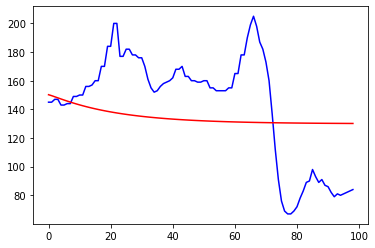

rmse_test_dataset1_AR: 59.77756637689657
mae_test_dataset1_AR: 42.25143895034373
mape_test_dataset1_AR: 0.26869569108090563


In [52]:
# Apply default Auto Regression Model
# This model requires number of lags (past samples) as a tunable parameter

# File 1 processing

#df = pd.read_csv("00221634_entries_2018-03-01_to_2018-08-05.csv", header=None)
#df = pd.read_csv("00221634_entries_2018-03-01_to_2018-08-05_BG_NullRemoved.csv", header=None)

df.head

# Remove the date column; just keep BG levels
df_BG=df.drop(df.columns[[0]], axis=1)

df_BG_numeric = df_BG.apply(pd.to_numeric, errors='coerce')

count_rows = df_BG_numeric.shape[0]  # Gives number of rows
count_cols = df_BG_numeric.shape[1]  # Gives number of columns
print('count_rows:', count_rows)
print('count_cols:', count_cols)

# Select first N entries for training and testing
# N = 1000
N = 40000

df_BG_numeric_selected=df_BG_numeric.head(N)
df_BG_numeric_selected.plot()
pyplot.show()

autocorrelation_plot(df_BG_numeric_selected)
pyplot.xlim(1,50)
pyplot.show()

# Try selected BG samples of a user
data = numpy.array(df_BG_numeric_selected)

num_test_samples=8000
train, test = data[1:len(data)-num_test_samples], data[len(data)-num_test_samples:]

# fit model
target_lags=3
#target_lags=12
ar_model = AutoReg(train, lags=target_lags)
ar_model_fit = ar_model.fit()
# let's make prediction
forecast = ar_model_fit.predict(len(train), len(train)+num_test_samples-1)
#print(forecast)

#plot the predictions for the test set
plt.plot(test[0:99], label='Test (Desired Output)', color='blue')
plt.plot(forecast[0:99], label='Prediction (Forecast)', color='red')
plt.show()

rmse_test_dataset1_AR = sqrt(mean_squared_error(test, forecast))
print('rmse_test_dataset1_AR:', rmse_test_dataset1_AR)

mae_test_dataset1_AR= mean_absolute_error(test, forecast)
print('mae_test_dataset1_AR:', mae_test_dataset1_AR)

mape_test_dataset1_AR= mean_absolute_percentage_error(test, forecast)
print('mape_test_dataset1_AR:', mape_test_dataset1_AR)


In [ ]:
# !pip install pyramid
# !pip install pmdarima



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=199507.779, Time=48.64 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=327652.463, Time=1.50 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=207388.465, Time=3.88 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=288037.321, Time=20.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=405258.935, Time=0.76 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=201459.688, Time=44.54 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=199506.541, Time=30.82 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=202952.411, Time=31.28 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=200999.128, Time=5.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=199507.878, Time=63.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=199937.586, Time=6.82 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=199506.541, Time=58.73 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=200309.875, Time=4.01 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 320

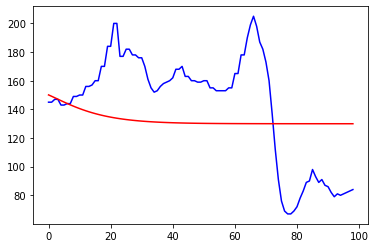

rmse_test_dataset1_ARIMA: 59.7773667078777
mae_test_dataset1_ARIMA: 42.26228198732686
mape_test_dataset1_ARIMA: 0.26879528596181523


In [53]:
# Apply Auto ARIMA Model
# ARIMA auotmatically tunes its parameters for the best fit

from pmdarima.arima import auto_arima


model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast_ARIMA = model.predict(n_periods=len(test))
# forecast_arima = pd.DataFrame(forecast_arima,index = test.index,columns=['Prediction'])

#plot the predictions for the test set
plt.plot(test[0:99], label='Test (Desired Output)', color='blue')
plt.plot(forecast_ARIMA[0:99], label='Prediction (Forecast)', color='red')
plt.show()

rmse_test_dataset1_ARIMA = sqrt(mean_squared_error(test, forecast_ARIMA))
print('rmse_test_dataset1_ARIMA:', rmse_test_dataset1_ARIMA)

mae_test_dataset1_ARIMA= mean_absolute_error(test, forecast_ARIMA)
print('mae_test_dataset1_ARIMA:', mae_test_dataset1_ARIMA)

mape_test_dataset1_ARIMA= mean_absolute_percentage_error(test, forecast_ARIMA)
print('mape_test_dataset1_ARIMA:', mape_test_dataset1_ARIMA)


In [ ]:
# Results are similar between Auto Regression and ARIMA.